# TEXT ANALYTICS
1) Apply text analytics to understand the relationship/similarity between companies based on their patents.  
2) Data is read from a zipped file called "Patents_xls.zip".  
3) When we unzip the file, we will get 13 Excel files, one for each company to be used in the analysis.   
4) Each Excel file contains patents granted to the company in a particular year.   
5) The columns relevant for analysis are "TI" (the title of the patent) and "AB" (Abstract of the patent).    
6) The corpus we will use for your analysis will contain 13 files, one for each company. Each file will contain the titles and abstracts of all the patents for that company.  

## Below are the requirements for analysis:
a) Preprocess the data.  
b) Perform the following unsupervised learning algorithms on the data:
   **Multidimensional Scaling, Hierarchical Clustering, and K-Means**. Do they yield similar results?  
c) Topic Modeling: Obtain 5 topics using three different algorithms, 
   namely, **NMF, LSA/LSI, and LDA**. Are the results similar?  

In [1]:
import pandas as pd
import numpy as np
import string
import nltk
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fahad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Read the 13 excel files from the patents_xls folder
import os
os.chdir("C:/Users/fahad/OneDrive/Desktop/UT ARLINGTON/3rd SEM - SUMMER/DATA SCIENCEPROG APPROACH/Assignments/Text Analytics/Patents_xls")

In [3]:
# pattern matching with the file names ending with ".xlsx" 
import glob as glob
files = glob.glob("*xlsx")
files

['Apple.xlsx',
 'Google.xlsx',
 'HTC.xlsx',
 'Huawei.xlsx',
 'InterDigital.xlsx',
 'Kodak.xlsx',
 'LG.xlsx',
 'Nokia.xlsx',
 'Oracle.xlsx',
 'Pantech.xlsx',
 'Samsung.xlsx',
 'Sony Ericsson.xlsx',
 'ZTE.xlsx']

In [4]:
# function defined for parsing - removing the punctuation, stopwords, lemmatize, etc
def parse(txt, punct = True, numbers = True, stemmer = False, lemmatize = True, stopword_list = []):
    txt = txt.lower()
    
    #remove punctuation
    import string
    if punct:
        p = string.punctuation
        tbl = str.maketrans(p, len(p) * " ")
        txt = txt.translate(tbl)
    if numbers:
        d = string.digits
        tbl = str.maketrans(d, len(d) * " ")
        txt = txt.translate(tbl)
    
    #remove stopwords
    import nltk
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(stopword_list)
    word_list = [word for word in txt.split() if word not in stopwords and len(word) > 3]
    
    
    #lemmatize by default
    import spacy
    import en_core_web_lg
    
    if lemmatize:
        txt = " ".join(word_list)
        nlp_en = en_core_web_lg.load()
        nlp_en.max_length = 6000000
        docs = nlp_en(txt, disable = ['ner', 'parser', 'textcat'])
        word_list = [doc.lemma_ for doc in docs]
        
        
    #stem if necessary
    if stemmer:
        s = nltk.PorterStemmer()
        word_list = [s.stem(word) for word in word_list]
        
    txt = " ".join(word_list)
    txt = txt.replace("-PRON-","")
    txt = txt.replace("PRON","")
    
    return txt

In [5]:
# function defined to remove the duplicate values from each file
from collections import Counter  
def remov_duplicates(txt): 
  
    # split input string separated by space 
    txt = txt.split(" ") 
  
    # joins two adjacent elements in iterable way 
    for i in range(0, len(txt)): 
        txt[i] = "".join(txt[i]) 
  
    # now create dictionary using counter method 
    # which will have strings as key and their  
    # frequencies as value 
    UniqW = Counter(txt) 
  
    # joins two adjacent elements in iterable way 
    txt = " ".join(UniqW.keys())
    return txt

In [6]:
# all 13 files are being read here
# data read for each row from columns TI and AB and concatenated together and then passed for parsing 
# and duplicates from each file have been removed
corpus = []
firm_names = []

for f in files:
    df = pd.read_excel(f)

    all_text = []
    
    for index, row in df.iterrows():
        all_text.append(row['TI'])
        all_text.append(row['AB'])
    final_text = ",".join(str(x) for x in all_text)
    txt = parse(final_text)
    txt_no_dupl = remov_duplicates(txt) 
    firm = f.split(".")[0]
    firm_names.append(firm)
    corpus.append(txt_no_dupl)

In [7]:
# final corpus containing all 13 excel files data is written to a text file
with open("corpus.txt", "w", encoding='utf-8') as outfile:
    outfile.write(str(corpus))
    
# all file names for 13 excel files is written to a text file
with open("firm_names.txt", "w", encoding='utf-8') as outfile:
    outfile.write(str(firm_names))

In [8]:
# converting the corpus data by passing on to the count vectorizer and getting the raw counts of each word in each document
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = CountVectorizer(stop_words = 'english', min_df = 2)
matrixCountV = vectorizer.fit_transform(corpus)
namesCountV = vectorizer.get_feature_names()
#cosine similarity
similarity_CountV = cosine_similarity(matrixCountV)
#convert to distance
cos_distance_CountV = 1 - similarity_CountV
print(namesCountV)
print(matrixCountV.toarray())

['abandon', 'abbreviate', 'abbreviated', 'abbreviation', 'aberration', 'ability', 'ablation', 'able', 'abnormal', 'abnormality', 'abnormally', 'abort', 'abrasion', 'abrasive', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absorb', 'absorbent', 'absorber', 'absorbing', 'absorption', 'abstract', 'abstraction', 'abut', 'accelerate', 'accelerated', 'acceleration', 'accelerator', 'accelerometer', 'accentuate', 'accept', 'acceptability', 'acceptable', 'acceptance', 'acceptor', 'access', 'accessed', 'accessibility', 'accessible', 'accessory', 'accidental', 'accommodate', 'accommodation', 'accompany', 'accomplish', 'accomplished', 'accord', 'accordance', 'according', 'accordingly', 'account', 'accounting', 'accumulate', 'accumulation', 'accumulator', 'accuracy', 'accurate', 'accurately', 'acetic', 'achieve', 'achromatic', 'acid', 'acidic', 'ack', 'ackch', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acoustic', 'acoustical', 'acoustically', 'acquire', 'acquirer', 'acquisition'

In [9]:
# appling the TFIDF vectorizer to the courpus data to get the weights of words by importance
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 2)
matrixTFID = vectorizer.fit_transform(corpus)
namesTFID = vectorizer.get_feature_names()
#cosine similarity
similarity_TFID = cosine_similarity(matrixTFID)
#convert to distance
cos_distance_TFID = 1 - similarity_TFID
print(namesTFID)
print(matrixTFID.toarray())

['abandon', 'abbreviate', 'abbreviated', 'abbreviation', 'aberration', 'ability', 'ablation', 'able', 'abnormal', 'abnormality', 'abnormally', 'abort', 'abrasion', 'abrasive', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absorb', 'absorbent', 'absorber', 'absorbing', 'absorption', 'abstract', 'abstraction', 'abut', 'accelerate', 'accelerated', 'acceleration', 'accelerator', 'accelerometer', 'accentuate', 'accept', 'acceptability', 'acceptable', 'acceptance', 'acceptor', 'access', 'accessed', 'accessibility', 'accessible', 'accessory', 'accidental', 'accommodate', 'accommodation', 'accompany', 'accomplish', 'accomplished', 'accord', 'accordance', 'according', 'accordingly', 'account', 'accounting', 'accumulate', 'accumulation', 'accumulator', 'accuracy', 'accurate', 'accurately', 'acetic', 'achieve', 'achromatic', 'acid', 'acidic', 'ack', 'ackch', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acoustic', 'acoustical', 'acoustically', 'acquire', 'acquirer', 'acquisition'

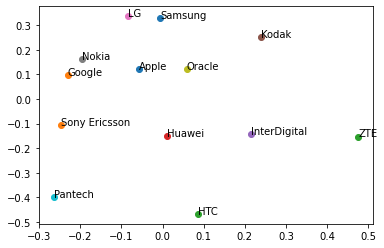

In [10]:
# Applying the multidimentional scaling(MDS) algorithm by using the cosine distance from Count Vectorizer
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

mds = MDS(n_components = 2, dissimilarity='precomputed', random_state=1)
pos = mds.fit_transform(cos_distance_CountV)

xs, ys = pos[:,0], pos[:,1]
for x, y, name in zip(xs, ys, firm_names):
    plt.scatter(x, y)
    plt.text(x, y, name)

plt.show()

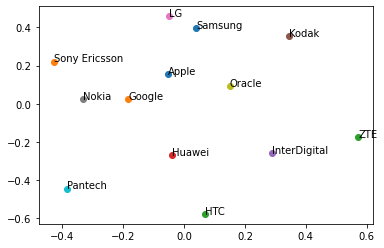

In [11]:
# Applying the multidimentional scaling(MDS) algorithm by using the cosine distance from TFIDF Vectorizer
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

mds = MDS(n_components = 2, dissimilarity='precomputed', random_state=1)
pos = mds.fit_transform(cos_distance_TFID)

xs, ys = pos[:,0], pos[:,1]
for x, y, name in zip(xs, ys, firm_names):
    plt.scatter(x, y)
    plt.text(x, y, name)

plt.show()

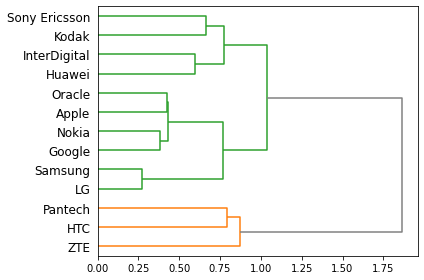

In [12]:
# Applying the Hierarchical algorithm by using the cosine distance from Count Vectorizer
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(cos_distance_CountV)
dendrogram(linkage_matrix, orientation ='right', above_threshold_color='grey', labels = firm_names)
plt.tight_layout()
plt.show()

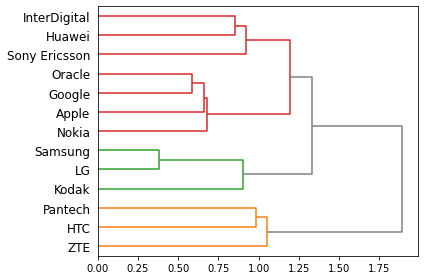

In [13]:
# Applying the Hierarchical algorithm by using the cosine distance from TFIDF Vectorizer
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(cos_distance_TFID)
dendrogram(linkage_matrix, orientation ='right', above_threshold_color='grey', labels = firm_names)
plt.tight_layout()
plt.show()

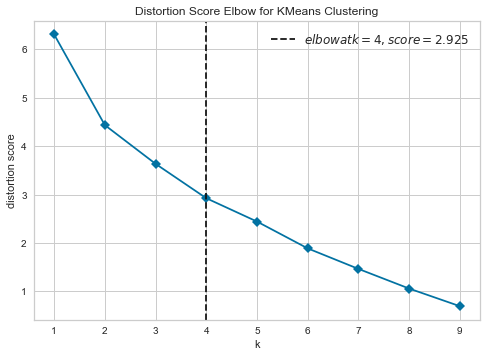

In [14]:
# The KElbowVisualizer implemented the “elbow” method to help to select the optimal number of clusters 
# by fitting the model with a range of values for K.
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(cos_distance_TFID)
visualizer.show()

In [15]:
# Applied the KMeans Clustering Algorithm with k value ='4'
km = KMeans(n_clusters=4, random_state=999)
km.fit(matrixTFID) #computes k-means clustering
cluster_membership = km.predict(matrixTFID) #predicts closest cluster
company_distance_to_center = km.transform(matrixTFID) #cluster distance

In [16]:
cluster_membership #assignment of companies to clusters

array([1, 1, 3, 0, 0, 2, 2, 1, 1, 3, 2, 1, 0])

In [17]:
company_distance_to_center #how far is each company from the centroids

array([[0.94158748, 0.61444821, 0.89531269, 1.05253981],
       [0.94279097, 0.58193191, 0.90673076, 1.0662123 ],
       [1.01364396, 1.02274195, 1.11729895, 0.58898647],
       [0.63199942, 0.87636685, 1.01944873, 1.02716841],
       [0.65328517, 0.92396812, 1.04778517, 1.04751829],
       [1.01893268, 0.92162079, 0.63270703, 1.08583917],
       [0.99369632, 0.85746955, 0.48586934, 1.09278665],
       [0.90844115, 0.61480051, 0.9097795 , 1.05642499],
       [0.94958997, 0.61929241, 0.92148741, 1.08588931],
       [0.99194918, 1.03033485, 1.12359367, 0.58898647],
       [0.99328932, 0.79527633, 0.46545793, 1.09787214],
       [0.94763738, 0.72778542, 0.99006276, 1.00098945],
       [0.67749905, 1.04848522, 1.14338175, 1.05322406]])

In [18]:
f=open("firm_names.txt", "r")
if f.mode == 'r':
    company_names = f.read()
    print(company_names)

['Apple', 'Google', 'HTC', 'Huawei', 'InterDigital', 'Kodak', 'LG', 'Nokia', 'Oracle', 'Pantech', 'Samsung', 'Sony Ericsson', 'ZTE']


In [19]:
type(company_names)

str

In [20]:
import ast
# Converting string to list 
company_names = ast.literal_eval(company_names)

In [21]:
type(company_names)

list

In [22]:
clusters = zip(cluster_membership, company_names)
print("{0:<15s}{1:<9s}".format("Company_Names","Cluster#"))
for cluster_number, company_name in clusters:
    print("{0:<15s}{1:2d}".format(company_name,cluster_number))

Company_Names  Cluster# 
Apple           1
Google          1
HTC             3
Huawei          0
InterDigital    0
Kodak           2
LG              2
Nokia           1
Oracle          1
Pantech         3
Samsung         2
Sony Ericsson   1
ZTE             0


In [23]:
companies = {'Company': company_names, 'Cluster#': cluster_membership,\
            'Centroid_Dist0':company_distance_to_center[0:,0],\
            'Centroid_Dist1':company_distance_to_center[0:,1],\
            'Centroid_Dist2':company_distance_to_center[0:,2],\
            'Centroid_Dist3':company_distance_to_center[0:,3]
            }
#let us put this in a dataframe
import pandas as pd
df = pd.DataFrame(companies)
new_df = df.sort_values(by='Cluster#')

In [24]:
new_df = new_df.reset_index(drop=True)
new_df

,Company,Cluster#,Centroid_Dist0,Centroid_Dist1,Centroid_Dist2,Centroid_Dist3
0,Huawei,0,0.631999,0.876367,1.019449,1.027168
1,InterDigital,0,0.653285,0.923968,1.047785,1.047518
2,ZTE,0,0.677499,1.048485,1.143382,1.053224
3,Apple,1,0.941587,0.614448,0.895313,1.052540
4,Google,1,0.942791,0.581932,0.906731,1.066212
5,Nokia,1,0.908441,0.614801,0.909779,1.056425
6,Oracle,1,0.949590,0.619292,0.921487,1.085889
7,Sony Ericsson,1,0.947637,0.727785,0.990063,1.000989
8,Kodak,2,1.018933,0.921621,0.632707,1.085839
9,LG,2,0.993696,0.857470,0.485869,1.092787


# Analysis Result:

Yes, all 3 algorithms namely, Multidimensional Scaling, Hierarchical Clustering, and K-Means yields similar results with few exceptions that i would like to mention below.

#### MultiDimensional Scaling (MDS):   
     Cluster 1: LG, Samsung, Kodak   
     Cluster 2: Sony Ericsson, Apple, Oracle, Nokia, Google   
     Cluster 3: Huawei, InterDigital, ZTE   
     Cluster 4: Pantech, HTC  
     
#### Hierarchical Clustering:   
     Cluster 1: InterDigital, Huawei, Sony Ericsson  
     Cluster 2: Oracle, Google, Apple, Nokia  
     Cluster 3: Samsung, LG, Kodak  
     Cluster 4: Pantech, HTC, ZTE  

#### KMeans Clustering: 
     Cluster 1: Huawei, InterDigital, ZTE
     Cluster 2: Apple, Google, Nokia, Oracle, Sony Ericsson
     Cluster 3: Kodak, LG, Samsung
     Cluster 4: HTC, Pantech
     
## Final Inference:  

From the results obtained from all 3 algorithms, we can say that, "**MDS**" and "**KMeans**" gives us exactly the same 4 clusters for our corpus data where as "**Hierarchical clustering**" algorithm gives similar clusters with few differences compared to the other 2 algorithms.
     


In [25]:
# NMF Algorithm applied to generate the top 5 topics with each topic limited to 10 words
import numpy as np
from sklearn import decomposition #for NMF

num_topics = 5
num_top_words = 10
nmf = decomposition.NMF(n_components = num_topics, max_iter=250, init='random', random_state=1)
doctopic = nmf.fit_transform(matrixTFID)
namesTFID = vectorizer.get_feature_names()
topic_words = []
for topic in nmf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([namesTFID[i] for i in word_idx])
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: calendar bad personalize submission privilege corrective agree practice challenge requestor
Topic 1: dispatching adaptability refurbish legal judging megaco modularize signatory undefined trunking
Topic 2: smsc reinitiate imsi codebooks uman unassigned despreader evolved agch allocatable
Topic 3: geomagnetic earphone printed flange wcdma speaker hinge audible originating rotatably
Topic 4: epitaxial ethylenically copolymerize evaporate evaporation intake nitrate insulating copolymer nickel


In [26]:
# LDA Algorithm applied to generate the top 5 topics with each topic limited to 10 words
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation #for LDA

vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=10000, stop_words='english')
num_topics = 5 #arbitrary
dtm = vectorizer.fit_transform(corpus)

lda = LatentDirichletAllocation(n_components=num_topics, learning_method ='batch',  max_iter=250, random_state=0)
doctopic = lda.fit_transform(dtm)
feature_names = vectorizer.get_feature_names()

def display_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx), " ".join([feature_names[i]
                for i in topic.argsort()[:-n_top_words - 1:-1]]))

display_topics(lda, feature_names, 10)

Topic 0: urgency pad conjugate variance positive characterize post signature square ieee
Topic 1: hear task play interruption parse consume rear concern execution broadcast
Topic 2: reinforce deflection limiter adjustably valve thumbnail angular circular absorption mouth
Topic 3: geomagnetic earphone monopole machine drop mount motion supply display board
Topic 4: geomagnetic evdo varistor transceived mistakenly transceiving unfolded unspecified hologram int


In [27]:
# LSA Algorithm applied to generate the top 5 topics with each topic limited to 10 words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

dtm = vectorizer.fit_transform(corpus)

# SVD represent documents and terms in vectors 
lsa_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=250, random_state=1)

lsa_model.fit_transform(dtm)

features = vectorizer.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    terms_comp = zip(features, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
   
    print("Topic "+str(i)+":", end=" ", flush=True)  
    for t in sorted_terms: print(t[0], end=" ", flush=True)
    print(" ")

Topic 0: earphone flange orthogonality subchannel umts wcdma handheld grounding fasten sectional  
Topic 1: contract satisfie trunk essential handshake judgment urgency prolong correspondingly realization  
Topic 2: earphone wcdma flange prolong datagram twist taste implementing playing spiral  
Topic 3: associates acute sliding bent triangular replication vocabulary dissipation facet middle  
Topic 4: try wired orthogonality subchannel umts interworking timeslot subassembly watermarke plmn  


# TOPIC MODELING ANALYSIS RESULT:  

#### NMF: 4 out of 5 topic makes sense (from Visual Self Analysis)
#### LDA: 5 out of 5 topic makes sense (from Visual Self Analysis)
#### LSA: 4 out of 5 topic makes sense (from Visual Self Analysis)

## Final Inference:  

All 3 different algorithms, namely, NMF, LSA/LSI, and LDA yields similar results, however, in our case "**LDA**" algorithm gave us more better meaningful topics comparable to other 2 algorithms.
